In [62]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 

In [63]:
df = pd.read_csv('CSVs/macrodata.csv',index_col=0,parse_dates=True)

In [64]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<Axes: >

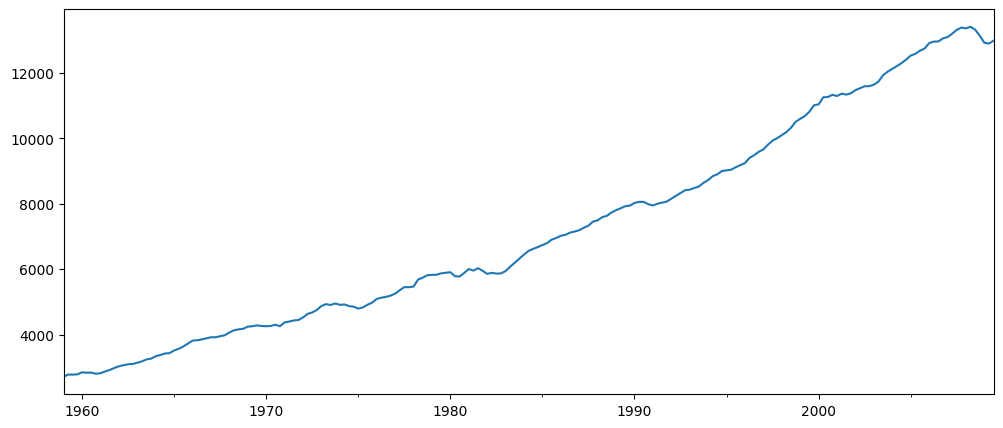

In [65]:
df['realgdp'].plot(figsize=(12,5))

In [66]:
from statsmodels.tsa.filters.hp_filter import hpfilter 

In [67]:
gdp_cycle,gdp_trend = hpfilter(df['realgdp'],lamb = 1600) 

In [68]:
type(gdp_cycle)

pandas.core.series.Series

In [69]:
df['trend']=gdp_trend
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


<Axes: >

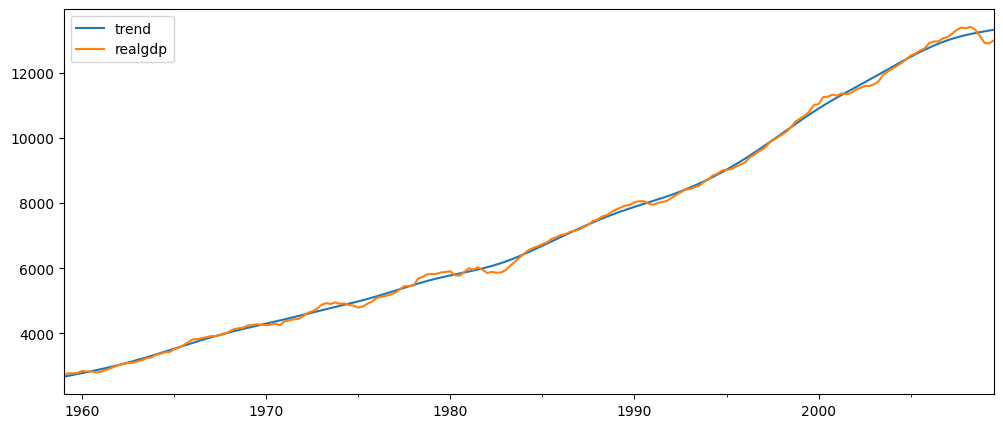

In [70]:
df[['trend','realgdp']].plot(figsize=(12,5))

In [71]:
df['cycle']=gdp_cycle
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend,cycle
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085,39.511915
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468,80.088532
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545,48.875455
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067,30.591933
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333,64.882667


<Axes: >

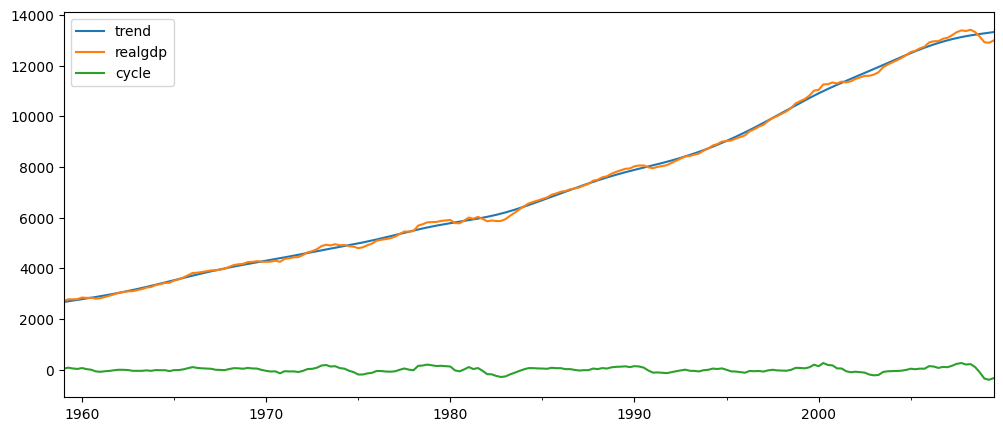

In [72]:
df[['trend','realgdp','cycle']].plot(figsize=(12,5))

# ETS Models
# ETS Decomposition 

In [73]:
airlines = pd.read_csv('CSVs/airline_passengers.csv',index_col='Month',parse_dates=True)

In [74]:
airlines=airlines.dropna()

In [75]:
airlines.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

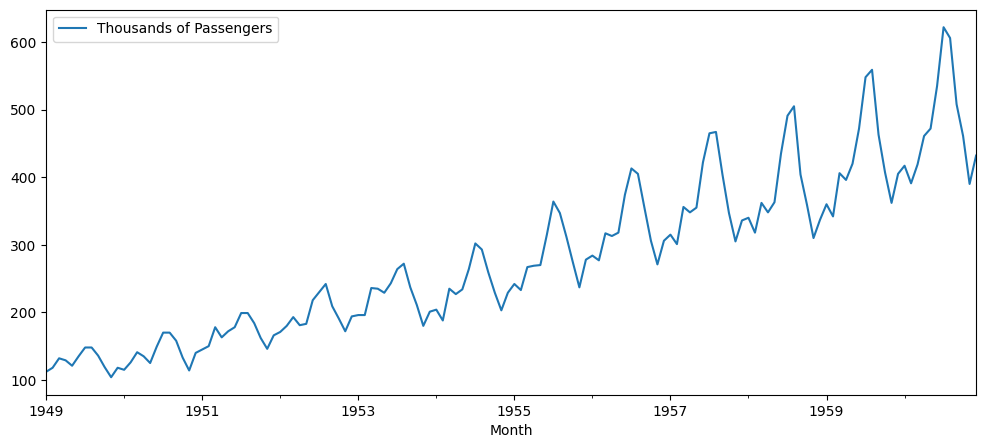

In [76]:
airlines.plot(figsize=(12,5))

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [78]:
result = seasonal_decompose(airlines['Thousands of Passengers'],model='multiplicative') # we are using multiplicative model because  the seasonal variations increase with the level of the series 


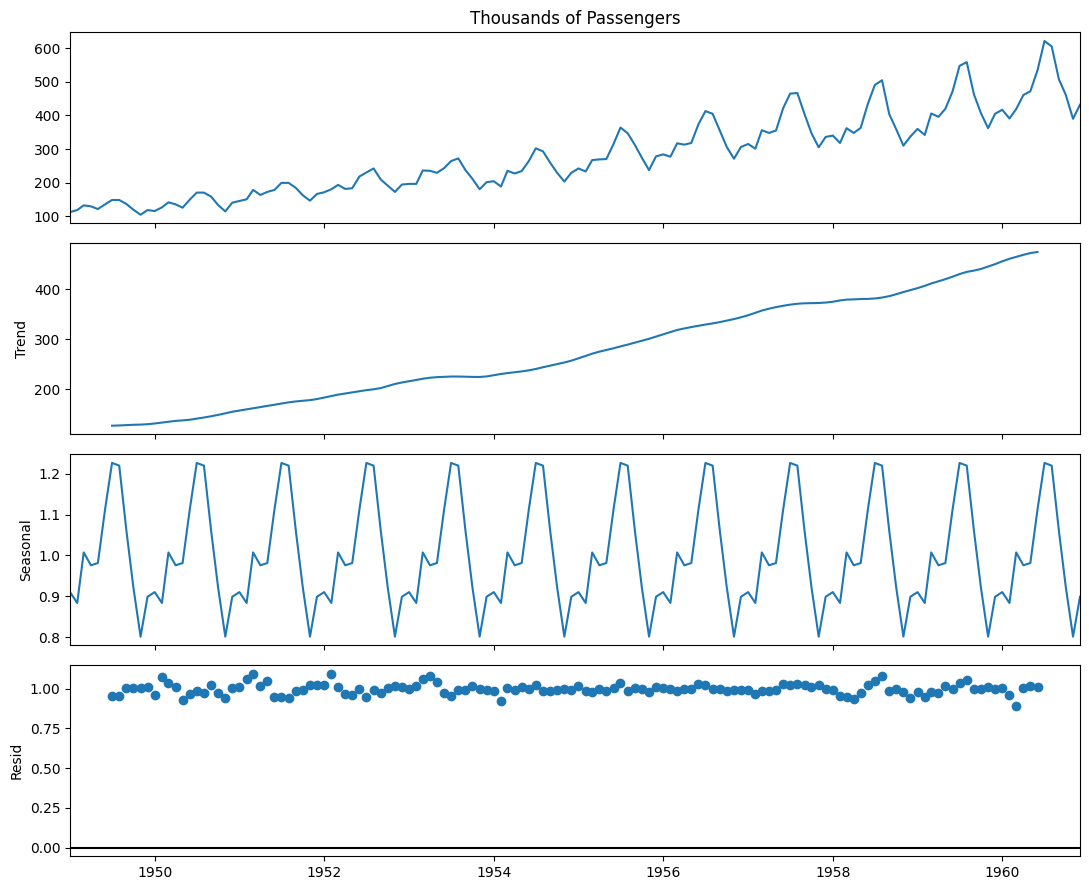

In [79]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,9
result.plot();

# EWMA

In [80]:
import matplotlib.pyplot as plt


In [81]:
airline = pd.read_csv('CSVs/airline_passengers.csv',index_col='Month')

In [82]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [83]:
airline.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [84]:
airline.dropna(inplace=True)

In [85]:
airline.index = pd.to_datetime(airline.index)

In [86]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [87]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [88]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean() ##rolling window is the number of periods to average over 


In [89]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

<Axes: xlabel='Month'>

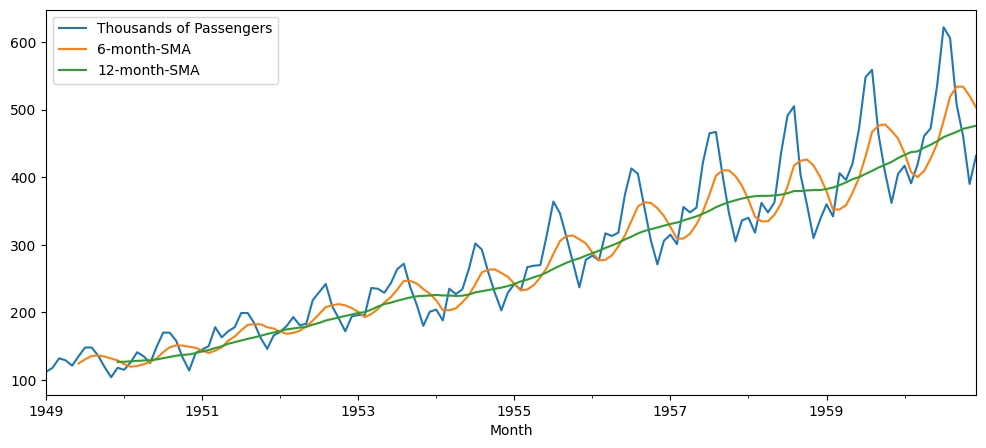

In [90]:
airline.plot(figsize=(12,5))

In [91]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean() #exponential weighted moving average 


<Axes: xlabel='Month'>

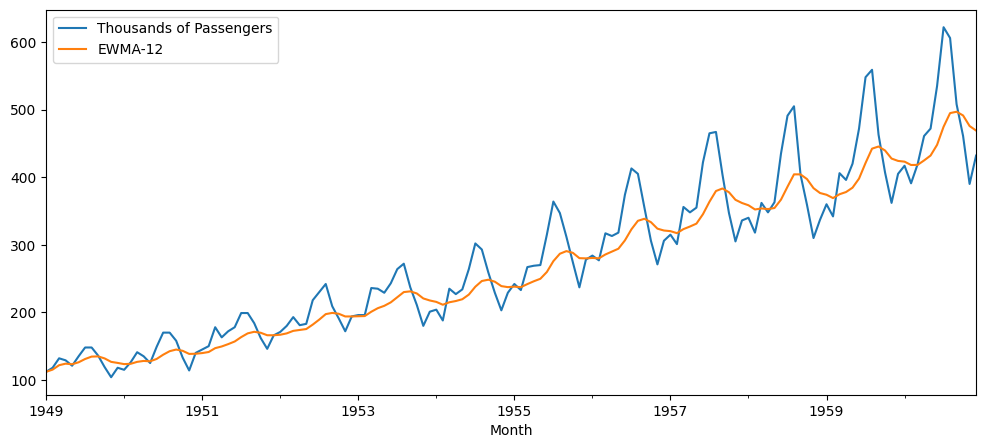

In [92]:
airline[['Thousands of Passengers','EWMA-12']].plot(figsize=(12,5))

# Holt Winters Method

In [93]:
df = pd.read_csv('CSVs/airline_passengers.csv',index_col='Month',parse_dates=True)

In [94]:
df = df.dropna()

In [95]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [96]:
df.index.freq= 'MS' #MS = month start frequency



In [97]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [98]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [100]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [101]:
span = 12
alpha = 2/(span+1)

In [102]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust = False).mean()

In [103]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [104]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [106]:
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [109]:
df['SES12']=fitted_model.fittedvalues.shift(-1)

In [110]:
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [111]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<Axes: xlabel='Month'>

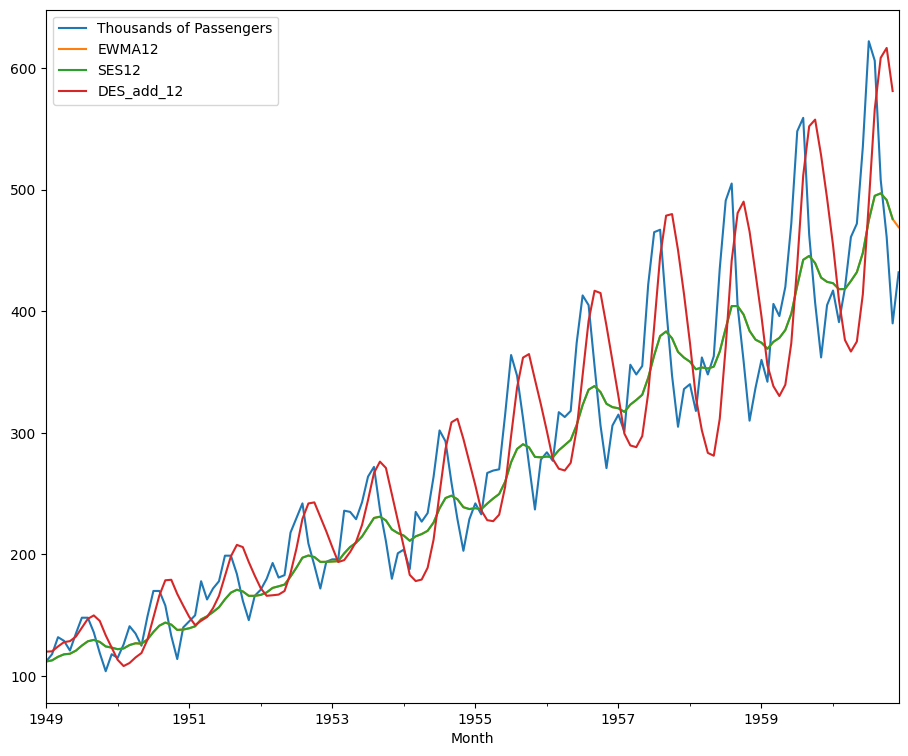

In [114]:
df.plot()

In [115]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1 )

In [116]:
df.head

<bound method NDFrame.head of             Thousands of Passengers      EWMA12       SES12  DES_add_12
Month                                                                  
1949-01-01                      112  112.000000  112.000000  114.102394
1949-02-01                      118  112.923077  112.923077  120.040657
1949-03-01                      132  115.857988  115.857988  134.001539
1949-04-01                      129  117.879836  117.879836  131.085845
1949-05-01                      121  118.359861  118.359861  123.110263
...                             ...         ...         ...         ...
1960-08-01                      606  494.898619  494.898619  608.168786
1960-09-01                      508  496.914216  496.914216  510.571382
1960-10-01                      461  491.388952  491.388952  463.313463
1960-11-01                      390  475.790652  475.790652  392.424879
1960-12-01                      432  469.053629         NaN         NaN

[144 rows x 4 columns]>

In [118]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12'], dtype='object')

<Axes: xlabel='Month'>

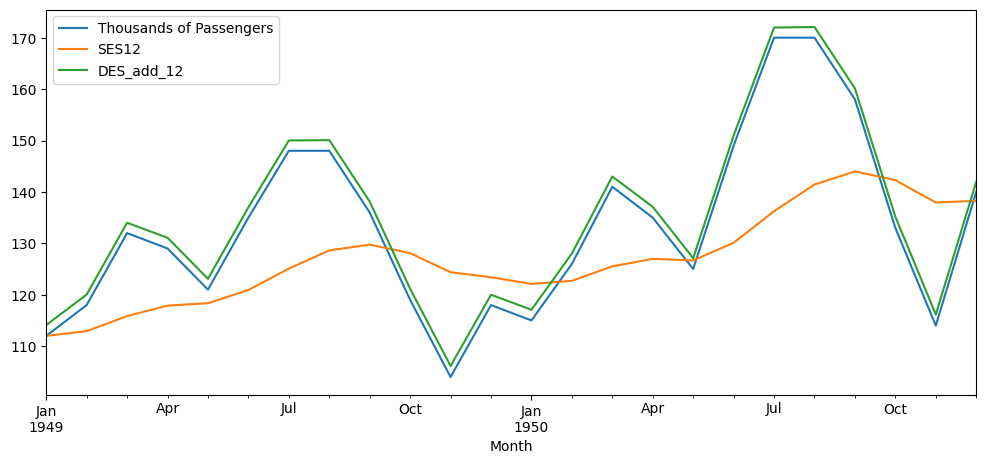

In [ ]:
df[['Thousands of Passengers','SES12','DES_add_12']].iloc[:24].plot(figsize=(12,5))#24 stands for the number of months

In [121]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1 )


In [122]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701
1949-02-01,118,112.923077,112.923077,120.040657,120.031669
1949-03-01,132,115.857988,115.857988,134.001539,134.235979
1949-04-01,129,117.879836,117.879836,131.085845,131.270786
1949-05-01,121,118.359861,118.359861,123.110263,123.156267


<Axes: xlabel='Month'>

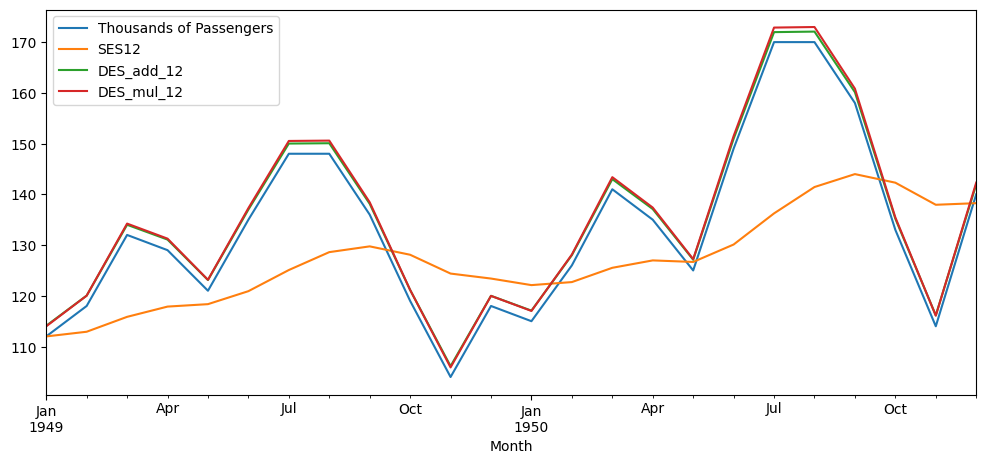

In [123]:
df[['Thousands of Passengers','SES12','DES_add_12','DES_mul_12']].iloc[:24].plot(figsize=(12,5))#24 stands for the number of months

In [125]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend = 'mul',seasonal = 'mul',seasonal_periods=12).fit().fittedvalues

c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annproject\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Month'>

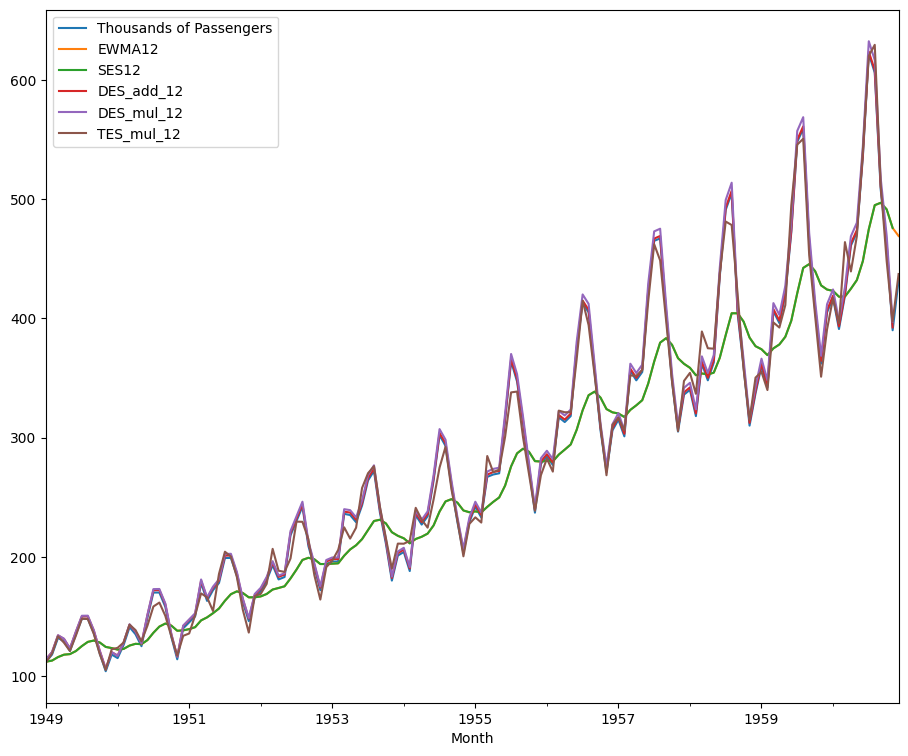

In [126]:
df.plot()

In [127]:

df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12',
       'DES_mul_12', 'TES_mul_12'],
      dtype='object')

<Axes: xlabel='Month'>

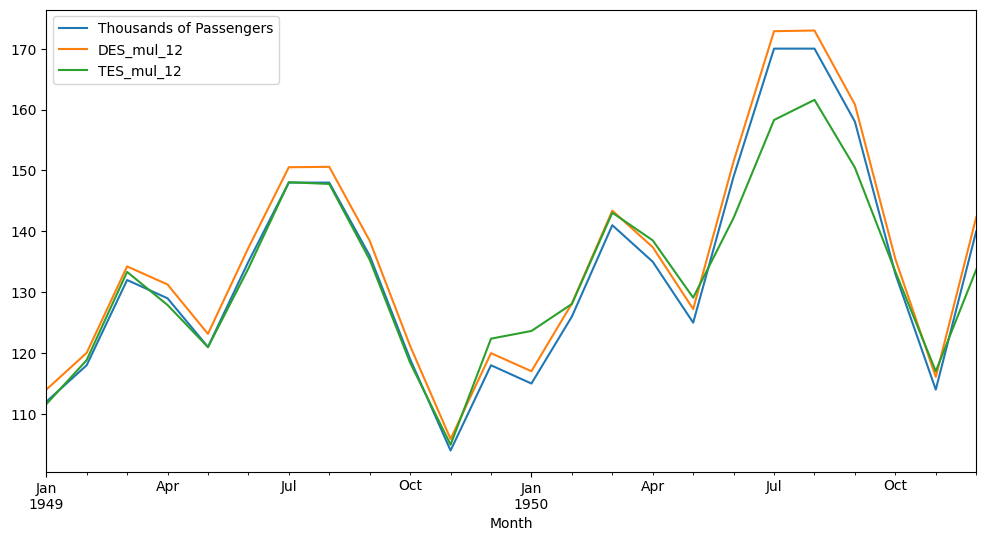

In [132]:
df[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].iloc[:24].plot(figsize=(12,6))